In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [3]:
# Read the csv file using 'read_csv'. Please write your dataset location here.
url = "https://drive.google.com/file/d/1tBRSb-aaHHL33NutwR8aV0m7t5bX63hr/view?usp=sharing"
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
movies = pd.read_csv(url)


In [4]:
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [5]:
# Check the number of rows and columns in the dataframe

movies.shape

(100, 62)

In [6]:
# Check the column-wise info of the dataframe

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [7]:
# Check the summary for the numeric columns 
movies.describe()


,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [8]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'
movies["budget"] = movies.budget.apply(lambda x: round(x/1000000,1))
movies["Gross"] =  movies.Gross.apply(lambda x: round(x/1000000,1))
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30.0,151.1,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150.0,341.3,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12.0,51.7,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47.0,100.5,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9.0,47.7,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [9]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column
movies["profit"] = movies.apply(lambda x: x["Gross"] - x["budget"], axis = 1)
movies.head()


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
0,La La Land,2016,30.0,151.1,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.1
1,Zootopia,2016,150.0,341.3,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.3
2,Lion,2016,12.0,51.7,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39.7
3,Arrival,2016,47.0,100.5,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.5
4,Manchester by the Sea,2016,9.0,47.7,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.7


In [10]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'
movies.sort_values(by = "profit", ascending = False, inplace = True)
movies.head(3)


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.7,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.7
11,The Avengers,2012,220.0,623.3,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.3
47,Deadpool,2016,58.0,363.0,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.0


In [11]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)

top10 = movies.iloc[:10,0]
top10

97    Star Wars: Episode VII - The Force Awakens
11                                  The Avengers
47                                      Deadpool
32               The Hunger Games: Catching Fire
12                                   Toy Story 3
8                          The Dark Knight Rises
45                                The Lego Movie
1                                       Zootopia
41                                 Despicable Me
18                                    Inside Out
Name: Title, dtype: object

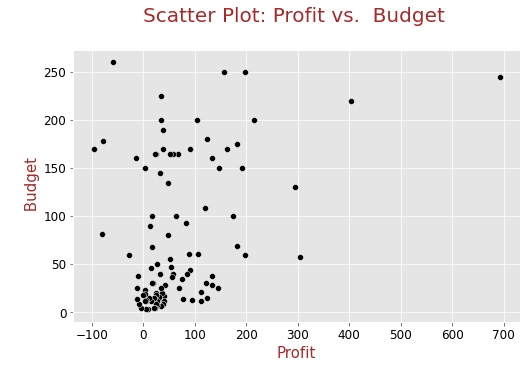

In [12]:
#Plot profit vs budget
plt.figure(figsize = [8,5])
plt.style.use("ggplot")
sns.scatterplot(data = movies, x = "profit", y = "budget",color = "black")
plt.xlabel("Profit", fontdict = {"fontsize":15, "fontweight":5,"color":"Brown"})
plt.ylabel("\n Budget", fontdict = {"fontsize":15, "fontweight":5,"color":"Brown"})
plt.title("Scatter Plot: Profit vs.  Budget \n", fontdict = {"fontsize":20, "fontweight":5, "color":"Brown"})
plt.xticks(fontsize = 12,color = "Black")
plt.yticks(fontsize = 12, color = "Black")
plt.show()


The dataset contains the 100 best performing movies from the year 2010 to 2016. However, the scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [13]:
#Find the movies with negative profit
neg_profit = movies[movies["profit"] < 0]
neg_profit.head()


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
99,Tucker and Dale vs Evil,2010,5.0,0.2,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779.0,440.0,...,7.7,7.5,7.4,7.7,7.1,7.7,7.5,R,Canada,-4.8
89,Amour,2012,8.9,0.2,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.7
56,Rush,2013,38.0,26.9,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11.1
66,Warrior,2011,25.0,13.7,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11.3
82,Flipped,2010,14.0,1.8,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.2


In [14]:
# Data Sanity Check:
# Since some columns are hidden: so trying to see the required columns through below code

neg_profit[["Title","title_year","IMDb_rating","MetaCritic","Gross","budget","profit"]]

,Title,title_year,IMDb_rating,MetaCritic,Gross,budget,profit
99,Tucker and Dale vs Evil,2010,7.6,65.0,0.2,5.0,-4.8
89,Amour,2012,7.9,94.0,0.2,8.9,-8.7
56,Rush,2013,8.1,75.0,26.9,38.0,-11.1
66,Warrior,2011,8.2,71.0,13.7,25.0,-11.3
82,Flipped,2010,7.7,NaN,1.8,14.0,-12.2
28,X-Men: First Class,2011,7.8,65.0,146.4,160.0,-13.6
46,Scott Pilgrim vs. the World,2010,7.5,69.0,31.5,60.0,-28.5
7,Tangled,2010,7.8,71.0,200.8,260.0,-59.2
17,Edge of Tomorrow,2014,7.9,71.0,100.2,178.0,-77.8
39,The Little Prince,2015,7.8,70.0,1.3,81.2,-79.9


- Inference from the above step:: All the movies above are profit making: problem is that their domestic gross is given not the world wide gross. In this movies data set: some movies even resulted went into losses may be people could not watch it for some or the other reason. Those movies are: Warrior, flipped, Scott Pilgrim vs.the World

**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

In [15]:
#Sanity Check for the above check point:
# finding negative profit for Title Tangled.

neg_profit[neg_profit["Title"] == "Tangled"]

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
7,Tangled,2010,260.0,200.8,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.2


- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to or greater than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [16]:
# Change the scale of MetaCritic
movies["MetaCritic"] = movies["MetaCritic"].apply(lambda x: x/10)
movies["MetaCritic"].head(3)


97    8.1
11    6.9
47    6.5
Name: MetaCritic, dtype: float64

In [17]:
# Find the average ratings
movies["Avg_rating"] = movies.apply(lambda x: (x["MetaCritic"] + x["IMDb_rating"])/2, axis = 1)
movies.head(3)



,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.7,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.7,8.10
11,The Avengers,2012,220.0,623.3,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.3,7.50
47,Deadpool,2016,58.0,363.0,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.0,7.25


In [18]:
#Sort in descending order of average rating

movies.sort_values("Avg_rating", ascending = False, inplace = True)
movies.head()


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
94,Boyhood,2014,4.0,25.4,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,...,7.7,7.7,7.7,7.2,8.0,7.9,R,USA,21.4,8.95
69,12 Years a Slave,2013,20.0,56.7,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,...,7.8,7.8,8.1,7.7,8.3,8.0,R,USA,36.7,8.85
18,Inside Out,2015,175.0,356.5,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.5,8.80
12,Toy Story 3,2010,200.0,415.0,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,215.0,8.75
4,Manchester by the Sea,2016,9.0,47.7,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.7,8.75


In [19]:
# Find the movies with metacritic-Imdb rating < 0.5 and also with an average rating of >= 8 (sorted in descending order)



UniversalAcclaim = movies[(abs(movies["MetaCritic"] - movies["IMDb_rating"]) < 0.5) & (movies["Avg_rating"] >= 8)]
UniversalAcclaim.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
95,Whiplash,2014,3.3,13.1,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.8,8.65
35,Django Unchained,2012,100.0,162.8,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.8,8.25
93,Dallas Buyers Club,2013,5.0,27.3,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,...,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22.3,8.20
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.7,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.7,8.10
3,Arrival,2016,47.0,100.5,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.5,8.05


In [20]:
# Data Sanity Check:
# Just checking: if main movies dataframe has not changed:

movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
94,Boyhood,2014,4.0,25.4,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,...,7.7,7.7,7.7,7.2,8.0,7.9,R,USA,21.4,8.95
69,12 Years a Slave,2013,20.0,56.7,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,...,7.8,7.8,8.1,7.7,8.3,8.0,R,USA,36.7,8.85
18,Inside Out,2015,175.0,356.5,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.5,8.80
12,Toy Story 3,2010,200.0,415.0,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,215.0,8.75
4,Manchester by the Sea,2016,9.0,47.7,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.7,8.75


**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?
Yes, we can spot it. Star Wars: Episode VII - The Force Awakens: having the 4th highest Avg_rating of 8.10. This movie has been liked by both critics and audiences alike. Movie with a profit of 691.7 million $ is another evidence that this movie is liked by most people including both Critics and General Audience.

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [21]:
# Write your code here
# Creating new column in movies dataset - "total_fb_likes" and assigning in it the values corresponding to the summation of actor 1 facebook likes, actor 2 facebook likes and actor 3 facebook likes
movies["total_fb_likes"] = movies.apply(lambda x: (x["actor_1_facebook_likes"] + x["actor_2_facebook_likes"]+ x["actor_3_facebook_likes"]), axis = 1)
movies.head()


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,total_fb_likes
94,Boyhood,2014,4.0,25.4,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,...,7.7,7.7,7.2,8.0,7.9,R,USA,21.4,8.95,550.0
69,12 Years a Slave,2013,20.0,56.7,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,...,7.8,8.1,7.7,8.3,8.0,R,USA,36.7,8.85,3160.0
18,Inside Out,2015,175.0,356.5,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,7.9,7.9,7.6,8.2,8.1,PG,USA,181.5,8.80,2151.0
12,Toy Story 3,2010,200.0,415.0,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.5,8.3,G,USA,215.0,8.75,16721.0
4,Manchester by the Sea,2016,9.0,47.7,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.1,7.9,7.8,R,USA,38.7,8.75,74818.0


In [22]:
# Assigning sorted movies dataset to trios (variable).
# This movies dataset is to be sorted in descending order w.r.t. the total facebook likes and that sorted dataframe need to be stored in a new variable named as trios.
trios = movies.sort_values("total_fb_likes",ascending = False)
trios.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,total_fb_likes
2,Lion,2016,12.0,51.7,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39.7,7.50,138800.0
27,Inception,2010,160.0,292.6,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.1,8.0,8.2,8.7,8.8,PG-13,USA,132.6,8.10,79000.0
14,X-Men: Days of Future Past,2014,200.0,233.9,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,...,7.7,7.9,7.4,8.1,7.9,PG-13,USA,33.9,7.70,76000.0
4,Manchester by the Sea,2016,9.0,47.7,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.1,7.9,7.8,R,USA,38.7,8.75,74818.0
8,The Dark Knight Rises,2012,250.0,448.1,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.1,8.10,73000.0


In [23]:
# Trying to get the top 5 trios in the form of list, and storing such values in the new variable: top5_trios:

top5_trios = trios.apply(lambda x: [x["actor_1_name"] +", "+ x["actor_2_name"] +", " + x["actor_3_name"]], axis = 1).head(5)
top5_trios

2               [Dev Patel, Nicole Kidman, Rooney Mara]
27    [Leonardo DiCaprio, Tom Hardy, Joseph Gordon-L...
14    [Jennifer Lawrence, Peter Dinklage, Hugh Jackman]
4     [Casey Affleck, Michelle Williams , Kyle Chand...
8     [Tom Hardy, Christian Bale, Joseph Gordon-Levitt]
dtype: object

In [24]:
# In the above output: still there are the row indices present: Thus, to get the output in proper form of a list without any indices: attempting the below code:
Lst_top5= []
for i in top5_trios:
    Lst_top5.append(i)
Lst_top5

[['Dev Patel, Nicole Kidman, Rooney Mara'],
 ['Leonardo DiCaprio, Tom Hardy, Joseph Gordon-Levitt'],
 ['Jennifer Lawrence, Peter Dinklage, Hugh Jackman'],
 ['Casey Affleck, Michelle Williams , Kyle Chandler'],
 ['Tom Hardy, Christian Bale, Joseph Gordon-Levitt']]

- Since it is not mentioned clearly in the question if we can get the output in the above format of list or just in a single list ( as below) all the required names of top 5 popular trios. Therefore, doing one more step to get the the same output in a single list through below code:

In [25]:
# Since it is not mentioned clearly in the question if we can get the output in the above format of list or just in a single list ( as below) all the required names of tyop 5 popular trios. Therefore, doing one more step to get the the same output in a single list through below code:
Lst_top_5= []
for i,j,k in zip(trios["actor_1_name"].head(), trios["actor_2_name"].head(), trios["actor_3_name"].head()):
    Lst_top_5.extend([i,j,k])
Lst_top_5

['Dev Patel',
 'Nicole Kidman',
 'Rooney Mara',
 'Leonardo DiCaprio',
 'Tom Hardy',
 'Joseph Gordon-Levitt',
 'Jennifer Lawrence',
 'Peter Dinklage',
 'Hugh Jackman',
 'Casey Affleck',
 'Michelle Williams ',
 'Kyle Chandler',
 'Tom Hardy',
 'Christian Bale',
 'Joseph Gordon-Levitt']

- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above? Write your answers in the markdown cell provided below.

In [26]:
# Filtering the trios dataset with a condition ensuring that none of the actor's facebook likes is less than half of the other two's, And the same filtered data set in another variable: pop_trios
pop_trios = trios[((trios["actor_1_facebook_likes"] >= 0.5*(trios["actor_2_facebook_likes"])) & (trios["actor_1_facebook_likes"] >= 0.5*(trios["actor_3_facebook_likes"]))) & ((trios["actor_2_facebook_likes"] >= 0.5*(trios["actor_1_facebook_likes"])) & (trios["actor_2_facebook_likes"] >= 0.5*(trios["actor_3_facebook_likes"]))) & ((trios["actor_3_facebook_likes"] >= 0.5*(trios["actor_1_facebook_likes"])) & (trios["actor_3_facebook_likes"] >= 0.5*(trios["actor_2_facebook_likes"])))]
pop_trios.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,total_fb_likes
27,Inception,2010,160.0,292.6,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.1,8.0,8.2,8.7,8.8,PG-13,USA,132.6,8.1,79000.0
14,X-Men: Days of Future Past,2014,200.0,233.9,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,...,7.7,7.9,7.4,8.1,7.9,PG-13,USA,33.9,7.7,76000.0
8,The Dark Knight Rises,2012,250.0,448.1,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.1,8.1,73000.0
11,The Avengers,2012,220.0,623.3,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.3,7.5,66000.0
9,Captain America: Civil War,2016,250.0,407.2,Robert Downey Jr.,Scarlett Johansson,Chris Evans,21000,19000.0,11000.0,...,7.6,7.9,7.5,8.1,7.7,PG-13,USA,157.2,7.7,51000.0


In [27]:
# Getting the popular top 5 trios ( after applying the above condition) in the form of a list as below:
lst_pop_top_5_trios = []
for i,j,k in zip(pop_trios["actor_1_name"].head(),pop_trios["actor_2_name"].head(), pop_trios["actor_3_name"].head()):
                 lst_pop_top_5_trios.append([i,j,k])
lst_pop_top_5_trios

[['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt'],
 ['Chris Hemsworth', 'Robert Downey Jr.', 'Scarlett Johansson'],
 ['Robert Downey Jr.', 'Scarlett Johansson', 'Chris Evans']]

Since it is not mentioned clearly in the question if we can get the output in the above format of list or just in a single list ( as below) all the required names of top 5 popular trios. Therefore, doing one more step to get the the same output in a single list through below code:

In [28]:
# Since it is not mentioned clearly in the question if we can get the output in the above format of list or just in a single list ( as below) all the required names of top 5 popular trios. Therefore, doing one more step to get the the same output in a single list through below code:
lst_pop_top_5__trios = []
for i,j,k in zip(pop_trios["actor_1_name"].head(),pop_trios["actor_2_name"].head(), pop_trios["actor_3_name"].head()):
                 lst_pop_top_5__trios.extend([i,j,k])
lst_pop_top_5__trios

['Leonardo DiCaprio',
 'Tom Hardy',
 'Joseph Gordon-Levitt',
 'Jennifer Lawrence',
 'Peter Dinklage',
 'Hugh Jackman',
 'Tom Hardy',
 'Christian Bale',
 'Joseph Gordon-Levitt',
 'Chris Hemsworth',
 'Robert Downey Jr.',
 'Scarlett Johansson',
 'Robert Downey Jr.',
 'Scarlett Johansson',
 'Chris Evans']

In [29]:
# Lst_top5: earlier top 5 popular trios list before the condition of one actor's facebook likes should not be less than half of the other two's.

Lst_top5

[['Dev Patel, Nicole Kidman, Rooney Mara'],
 ['Leonardo DiCaprio, Tom Hardy, Joseph Gordon-Levitt'],
 ['Jennifer Lawrence, Peter Dinklage, Hugh Jackman'],
 ['Casey Affleck, Michelle Williams , Kyle Chandler'],
 ['Tom Hardy, Christian Bale, Joseph Gordon-Levitt']]

In [30]:
# lst_pop_top_5_trios: list of top 5 popular trios after applying condition where one actor's facebook likes should not be less than half of the other two's.
lst_pop_top_5_trios

[['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt'],
 ['Chris Hemsworth', 'Robert Downey Jr.', 'Scarlett Johansson'],
 ['Robert Downey Jr.', 'Scarlett Johansson', 'Chris Evans']]

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`** (your answer here)
Only three trios from (Lst_top5) (before applying the above condition) comes in the top 5 popular trios list (lst_pop_top_5_trios) after applying the above question condition.
List that is coming now from ealier one is as follows: 
[['Leonardo DiCaprio, Tom Hardy, Joseph Gordon-Levitt'],
 ['Jennifer Lawrence, Peter Dinklage, Hugh Jackman'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]


- **`Most popular trio after applying the condition:`** (your answer here)
lst_pop_top_5_trios is the name of that list (after applying the above question's condition):
ist Output( Most popular Trio) of that list is:
['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt']

The above is the ranks no.1 in terms of popularity (Trios) after applying the above condition. Buy there are many others too which rank no.2,no 3,no.4 , and no.5 in terms of popularity (Trios) after applying the above condition. The output of lst_pop_top_5_trios is the answer to other popular trios which rank 1,2,3,4, and 5. In the its output, 1st trios list of rank 1  comes first, 2nd trios list of rank 2 comes 2nd in its output (lst_pop_top_5_trios) and likewise for rank 3rd , 4th and 5th.

The Output for the same list ( lst_pop_top_5_trios ) is shown in the above code too.

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [31]:
# Your answer here (optional and not graded)
# Trying the above and the same task through if statement below:
pop_trios_afc = []

for i,j,k,m,n,o in zip(trios["actor_1_facebook_likes"], trios["actor_2_facebook_likes"], trios["actor_3_facebook_likes"],trios["actor_1_name"],trios["actor_2_name"],trios["actor_3_name"]):
    if (i >= 0.5*(j)) & (i >= 0.5*(k)):
        if (j >= 0.5*(i)) & (j >= 0.5*(k)):
            if (k >= 0.5*(i)) & (k >= 0.5*(j)):
                pop_trios_afc.append([m,n,o])

m5_pop_trios_afc = pop_trios_afc[:5]
m5_pop_trios_afc

[['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt'],
 ['Chris Hemsworth', 'Robert Downey Jr.', 'Scarlett Johansson'],
 ['Robert Downey Jr.', 'Scarlett Johansson', 'Chris Evans']]

- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

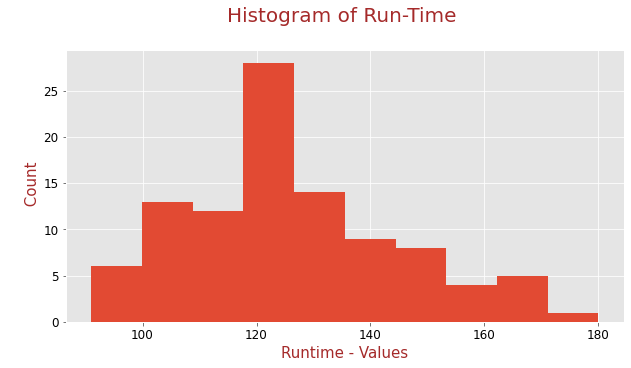

In [32]:
# Runtime histogram
plt.figure(figsize = [10,5])
plt.hist(trios["Runtime"])
plt.xlabel("Runtime - Values", fontdict = {"fontsize":15, "fontweight":5,"color":"Brown"})
plt.ylabel("\n Count", fontdict = {"fontsize":15, "fontweight":5,"color":"Brown"})
plt.title("Histogram of Run-Time \n", fontdict = {"fontsize":20, "fontweight":5, "color":"Brown"})
plt.xticks(fontsize = 12,color = "Black")
plt.yticks(fontsize = 12, color = "Black")
plt.show()

### Data Sanity Checks Starts Below:

In [33]:
trios.Runtime.value_counts()

124    10
108     5
100     4
118     3
126     3
121     3
146     3
123     3
120     3
134     3
132     3
109     2
94      2
117     2
115     2
136     2
128     2
116     2
169     2
102     2
165     2
158     2
143     2
133     2
147     2
130     2
164     1
144     1
112     1
113     1
161     1
95      1
149     1
99      1
98      1
131     1
127     1
137     1
125     1
103     1
122     1
142     1
153     1
114     1
119     1
156     1
107     1
110     1
148     1
140     1
138     1
180     1
91      1
Name: Runtime, dtype: int64

In [34]:
trios[(trios["Runtime"] >=120) & (trios["Runtime"] <=130)].shape

(29, 65)

- Inference from above step: Many movies (almost 29) lies in the maximum range of 120 min-130 min Runtime.

### Data Sanity Checks end above

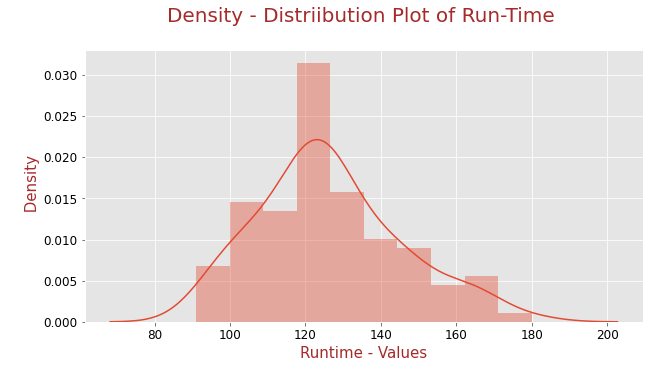

In [35]:
# Runtime density plot
plt.figure(figsize = [10,5])
sns.distplot( trios["Runtime"])
plt.xlabel("Runtime - Values", fontdict = {"fontsize":15, "fontweight":5,"color":"Brown"})
plt.ylabel("\n Density", fontdict = {"fontsize":15, "fontweight":5,"color":"Brown"})
plt.title("Density - Distriibution Plot of Run-Time \n", fontdict = {"fontsize":20, "fontweight":5, "color":"Brown"})
plt.xticks(fontsize = 12,color = "Black")
plt.yticks(fontsize = 12, color = "Black")
plt.show()

- Inference from above step: Many movies (around 0.020%) lies in the range of 120 minutes Runtime

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.
Ans. Correct

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [36]:
# Write your code here
# Filtering the trios data set out  with the R rated movies and storing the same in R_rated variable
R_rated = trios[trios["content_rating"] == "R"]
R_rated.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,total_fb_likes
4,Manchester by the Sea,2016,9.0,47.7,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.1,7.9,7.8,R,USA,38.7,8.75,74818.0
68,Silver Linings Playbook,2012,21.0,132.1,Jennifer Lawrence,Robert De Niro,Bradley Cooper,34000,22000.0,14000.0,...,7.6,7.7,6.9,8.0,7.6,R,USA,111.1,7.95,70000.0
62,The Big Short,2015,28.0,70.2,Ryan Gosling,Christian Bale,Charlie Talbert,33000,23000.0,767.0,...,7.7,7.8,7.3,7.9,7.7,R,USA,42.2,7.95,56767.0
31,The Revenant,2015,135.0,183.6,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000.0,733.0,...,7.8,7.8,7.6,8.1,7.9,R,USA,48.6,7.80,56733.0
36,The Wolf of Wall Street,2013,100.0,116.9,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,...,7.6,7.5,7.8,8.1,8.1,R,USA,16.9,7.85,44000.0


In [37]:
# Sorting the R_rated dataframe in the descending order of CVotesU18 Column values:
R_rated.sort_values("CVotesU18", ascending = False, inplace = True)
R_rated

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,total_fb_likes
47,Deadpool,2016,58.0,363.0,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.9,7.3,8.1,7.9,R,USA,305.0,7.25,17166.0
36,The Wolf of Wall Street,2013,100.0,116.9,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,...,7.6,7.5,7.8,8.1,8.1,R,USA,16.9,7.85,44000.0
35,Django Unchained,2012,100.0,162.8,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.1,7.8,8.4,8.4,R,USA,62.8,8.25,40265.0
29,Mad Max: Fury Road,2015,150.0,153.6,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,...,7.5,7.2,8.0,8.2,8.0,R,Australia,3.6,8.55,36943.0
95,Whiplash,2014,3.3,13.1,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.2,8.0,8.6,8.4,R,USA,9.8,8.65,25505.0
31,The Revenant,2015,135.0,183.6,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000.0,733.0,...,7.8,7.8,7.6,8.1,7.9,R,USA,48.6,7.80,56733.0
40,Shutter Island,2010,80.0,128.0,Leonardo DiCaprio,Joseph Sikora,Nellie Sciutto,29000,223.0,163.0,...,7.4,7.6,7.6,7.8,8.1,R,USA,48.0,7.20,29386.0
43,Gone Girl,2014,61.0,167.7,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.6,8.1,8.1,R,USA,106.7,8.00,2272.0
65,The Grand Budapest Hotel,2014,25.0,59.1,Bill Murray,Tom Wilkinson,F. Murray Abraham,13000,1000.0,670.0,...,7.8,7.9,7.7,8.1,8.0,R,USA,34.1,8.45,14670.0
72,Birdman or (The Unexpected Virtue of Ignorance),2014,18.0,42.3,Emma Stone,Naomi Watts,Merritt Wever,15000,6000.0,529.0,...,7.3,7.0,7.1,7.9,7.7,R,USA,24.3,8.30,21529.0


In [38]:
# Chceking the top 10 movies in the R_rated dataframe after sorting it in the descending order of CVotesU18 column values:
R_rated["Title"].head(10)

47                                           Deadpool
36                            The Wolf of Wall Street
35                                   Django Unchained
29                                 Mad Max: Fury Road
95                                           Whiplash
31                                       The Revenant
40                                     Shutter Island
43                                          Gone Girl
65                           The Grand Budapest Hotel
72    Birdman or (The Unexpected Virtue of Ignorance)
Name: Title, dtype: object

In [39]:
# Storing the Top 10 rated movies dataset in new variable: PopularR
PopularR = R_rated.head(10)
PopularR.head(3)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,total_fb_likes
47,Deadpool,2016,58.0,363.0,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.9,7.3,8.1,7.9,R,USA,305.0,7.25,17166.0
36,The Wolf of Wall Street,2013,100.0,116.9,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,...,7.6,7.5,7.8,8.1,8.1,R,USA,16.9,7.85,44000.0
35,Django Unchained,2012,100.0,162.8,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.1,7.8,8.4,8.4,R,USA,62.8,8.25,40265.0


In [40]:
# Checking the popularR movies:
PopularR["Title"]

47                                           Deadpool
36                            The Wolf of Wall Street
35                                   Django Unchained
29                                 Mad Max: Fury Road
95                                           Whiplash
31                                       The Revenant
40                                     Shutter Island
43                                          Gone Girl
65                           The Grand Budapest Hotel
72    Birdman or (The Unexpected Virtue of Ignorance)
Name: Title, dtype: object

In [41]:
# Chceking the topmost (top 1) movies in the PopularR along with the mapped info of its CVotesU18:
PopularR[["Title", "CVotesU18"]].head(1)

,Title,CVotesU18
47,Deadpool,4598


**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?
 Ans. Yes, Deadpool is the most watched movies by these kids if we just consider CVotesU18 (average votes by under 18 age group), and the average votes given to Deadpool by them is 4598

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [42]:
# Data Check:for columns of trios:
trios.columns

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country', 'profit', 'Avg_rating',
       'total_fb_likes'],
      dtype='obj

In [43]:
# Create the dataframe df_by_genre


df_by_genre = trios[["genre_1", "genre_2", "genre_3",'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS']]

In [44]:
# checking the rows and columns of dataframe: df_by_genre
df_by_genre.shape

(100, 47)

In [45]:
# Create a column cnt and initialize it to 1
df_by_genre["cnt"] = 1
df_by_genre.head()



,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
2,Biography,Drama,NaN,23325,29830,40564,20296,5842,1669,558,...,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,1
27,Action,Adventure,Sci-Fi,584839,485218,304457,130972,46393,20595,10050,...,8.7,8.7,8.5,8.1,8.1,8.0,8.2,8.7,8.8,1
14,Action,Adventure,Sci-Fi,91765,127521,183578,104658,33027,10059,3710,...,7.8,7.8,8.0,7.7,7.7,7.9,7.4,8.1,7.9,1
4,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,...,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,1
8,Action,Thriller,NaN,380589,341965,281426,134959,50406,20106,9589,...,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,1


In [46]:
# Group the movies by individual genres

df_by_g1 = df_by_genre.groupby(by = ["genre_1"]).sum()
df_by_g2 = df_by_genre.groupby(by = ["genre_2"]).sum()
df_by_g3 = df_by_genre.groupby(by = ["genre_3"]).sum()


df_by_g1.head()


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_1,,,,,,,,,,,,,,,,,,,,,
Action,2928407,3261919,4247693,2662020,986774,364234,156150,89483,61975,162426,...,209.1,208.8,210.0,206.5,206.0,209.0,197.2,215.8,209.5,27
Adventure,1058779,1179818,1560541,966275,365486,136985,58559,33174,22018,48100,...,92.7,92.6,93.5,92.0,91.6,93.8,88.9,95.3,93.5,12
Animation,681562,798227,1153214,722782,251076,83069,30718,15733,10026,25193,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11
Biography,666831,1088430,1654704,962977,306247,100005,38874,21536,15365,37469,...,100.8,100.7,101.3,100.5,100.0,102.9,94.7,103.3,101.5,13
Comedy,371217,496905,770395,518566,205434,81933,35788,20965,15286,33241,...,68.6,68.7,68.9,67.7,67.5,68.7,62.7,70.9,69.4,9


In [47]:
# Sanity Check:
# Checking if I got all the required columns in df_by_genre

df_by_g1.columns

Index(['CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05',
       'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale',
       'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829',
       'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'Votes1000', 'VotesUS', 'VotesnUS', 'cnt'],
      dtype='object')

In [48]:
# Add the grouped data frames and store it in a new data frame

df_add = df_by_g1.add(df_by_g2, fill_value = 0).add(df_by_g3, fill_value = 0)
df_add.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0


In [49]:
# Extract genres with atleast 10 occurences
genre_top10 = df_add[df_add["cnt"] >= 10]
genre_top10


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Romance,549959.0,689492.0,1069280.0,712841.0,281289.0,110901.0,48913.0,27698.0,19200.0,40075.0,...,98.9,98.9,99.6,97.8,97.5,98.9,89.9,101.8,100.1,13.0
Sci-Fi,2325284.0,2530855.0,3002994.0,1802098.0,671811.0,254175.0,111925.0,65904.0,46171.0,114435.0,...,133.6,133.5,133.2,131.1,130.8,131.5,127.9,137.5,134.0,17.0
Thriller,1081701.0,1465491.0,1993378.0,1175799.0,416046.0,149953.0,65281.0,37940.0,25767.0,57630.0,...,100.6,100.7,100.1,99.6,99.3,100.7,96.2,103.1,101.5,13.0


In [50]:
# Take the mean for every column by dividing with cnt 

for x in genre_top10.columns[:-1]: 
    genre_top10[x] = genre_top10[x]/ genre_top10["cnt"]
genre_top10


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,31.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,38.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273,11.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222,18.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261,23.0
Crime,52229.636364,87919.818182,129045.000000,74671.818182,25308.272727,8971.818182,3842.818182,2246.636364,1544.090909,3383.363636,...,7.718182,7.763636,7.609091,7.627273,7.618182,7.681818,7.390909,7.981818,7.800000,11.0
Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,3250.892308,...,7.712308,7.709231,7.720000,7.643077,7.620000,7.741538,7.223077,7.936923,7.784615,65.0
Romance,42304.538462,53037.846154,82252.307692,54833.923077,21637.615385,8530.846154,3762.538462,2130.615385,1476.923077,3082.692308,...,7.607692,7.607692,7.661538,7.523077,7.500000,7.607692,6.915385,7.830769,7.700000,13.0
Sci-Fi,136781.411765,148873.823529,176646.705882,106005.764706,39518.294118,14951.470588,6583.823529,3876.705882,2715.941176,6731.470588,...,7.858824,7.852941,7.835294,7.711765,7.694118,7.735294,7.523529,8.088235,7.882353,17.0
Thriller,83207.769231,112730.076923,153336.769231,90446.076923,32003.538462,11534.846154,5021.615385,2918.461538,1982.076923,4433.076923,...,7.738462,7.746154,7.700000,7.661538,7.638462,7.746154,7.400000,7.930769,7.807692,13.0


In [51]:
# Rounding off the columns of Votes to two decimals

vote_col = genre_top10.loc[:,"VotesM":"VotesnUS"].columns
genre_top10[vote_col] = round(genre_top10[vote_col],2)
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Crime,52229.636364,87919.818182,129045.000000,74671.818182,25308.272727,8971.818182,3842.818182,2246.636364,1544.090909,3383.363636,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,3250.892308,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Romance,42304.538462,53037.846154,82252.307692,54833.923077,21637.615385,8530.846154,3762.538462,2130.615385,1476.923077,3082.692308,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
Sci-Fi,136781.411765,148873.823529,176646.705882,106005.764706,39518.294118,14951.470588,6583.823529,3876.705882,2715.941176,6731.470588,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Thriller,83207.769231,112730.076923,153336.769231,90446.076923,32003.538462,11534.846154,5021.615385,2918.461538,1982.076923,4433.076923,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0


In [52]:
# Converting CVotes to int type
cvote_col = genre_top10.loc[:,"CVotes10":"CVotesnUS"].columns
genre_top10[cvote_col] = genre_top10[cvote_col].astype("int")


In [53]:
# Sanity Chcek:
# Checking if datatype has actually changed or not
genre_top10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Action to Thriller
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CVotes10      10 non-null     int32  
 1   CVotes09      10 non-null     int32  
 2   CVotes08      10 non-null     int32  
 3   CVotes07      10 non-null     int32  
 4   CVotes06      10 non-null     int32  
 5   CVotes05      10 non-null     int32  
 6   CVotes04      10 non-null     int32  
 7   CVotes03      10 non-null     int32  
 8   CVotes02      10 non-null     int32  
 9   CVotes01      10 non-null     int32  
 10  CVotesMale    10 non-null     int32  
 11  CVotesFemale  10 non-null     int32  
 12  CVotesU18     10 non-null     int32  
 13  CVotesU18M    10 non-null     int32  
 14  CVotesU18F    10 non-null     int32  
 15  CVotes1829    10 non-null     int32  
 16  CVotes1829M   10 non-null     int32  
 17  CVotes1829F   10 non-null     int32  
 18  CVotes3044    10 non-null 

If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

In [54]:
# Sanity Check:
# Preparing the genre_top10 dataframe for bar chart for above task:
genre_top10= genre_top10.reset_index()
genre_top10.rename(columns = {"index": "genre"},inplace = True)
genre_top10

,genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
1,Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
2,Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
3,Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
4,Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
5,Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
6,Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
7,Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
8,Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
9,Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0


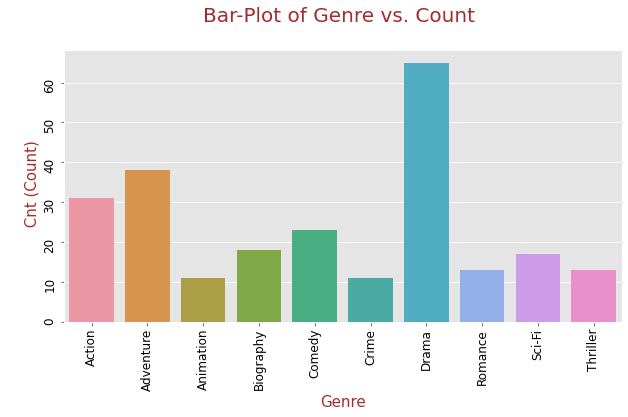

In [55]:
# Bar chart for the above task: genre vs Count is below:
plt.figure(figsize = [10,5])
sns.barplot(genre_top10["genre"], genre_top10["cnt"], estimator = lambda x: x.sum())
plt.xlabel("Genre", fontdict = {"fontsize":15, "fontweight":5,"color":"Brown"})
plt.ylabel("\n Cnt (Count)", fontdict = {"fontsize":15, "fontweight":5,"color":"Brown"})
plt.title("Bar-Plot of Genre vs. Count \n", fontdict = {"fontsize":20, "fontweight":5, "color":"Brown"})
plt.xticks(fontsize = 12, rotation = 90, color = "Black")
plt.yticks(fontsize = 12, rotation = 90, color = "Black")
plt.show()


In [56]:
# Sanity Checks:
# Getting all the required info for countplot such as All the genres info in a single column of a dataframe from multiple columns of different genres from df_by_genre

df1 = pd.concat([df_by_genre["genre_1"],df_by_genre["genre_2"],df_by_genre["genre_3"]],axis = 0)
df2 = pd.DataFrame()
df2["genre"] = df1
df2.head()

,genre
2,Biography
27,Action
14,Action
4,Drama
8,Action


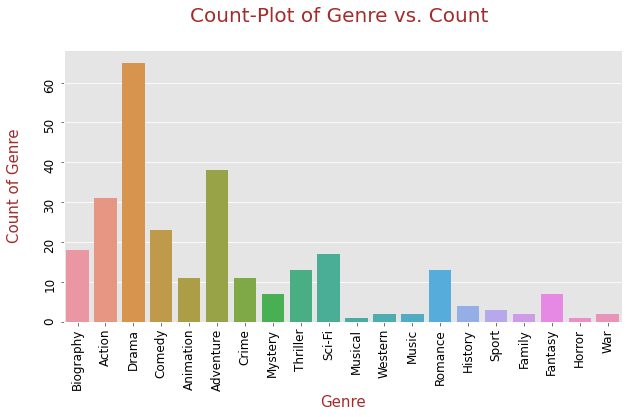

In [57]:
# Countplot for genres

plt.figure(figsize = [10,5])
sns.countplot(df2["genre"])
plt.xlabel("Genre", fontdict = {"fontsize":15, "fontweight":5,"color":"Brown"})
plt.ylabel("Count of Genre\n", fontdict = {"fontsize":15, "fontweight":5,"color":"Brown"})
plt.title("Count-Plot of Genre vs. Count \n", fontdict = {"fontsize":20, "fontweight":5, "color":"Brown"})
plt.xticks(fontsize = 12, rotation = 90, color = "Black")
plt.yticks(fontsize = 12, rotation = 90, color = "Black")

plt.show()


In [58]:
# Performing some Sanity Checks below: 
# For better reading of the above graph, checking figure for each genre with the below code

genre_top10.groupby("genre")["cnt"].sum()

genre
Action       31.0
Adventure    38.0
Animation    11.0
Biography    18.0
Comedy       23.0
Crime        11.0
Drama        65.0
Romance      13.0
Sci-Fi       17.0
Thriller     13.0
Name: cnt, dtype: float64

**`Checkpoint 5:`** Is the bar for `Drama` the tallest?
 Ans. Yes , definitely it's the highest bar with a value of 65. In other words, it means that many movies (almost around 65) were made of Genre: Drama. 

-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

In [59]:
# Preparing the pivot table for male-cvote vs genre:

m_cvote_genre = pd.pivot_table(data = genre_top10, index = ["genre"], values = ["CVotesU18M","CVotes1829M","CVotes3044M","CVotes45AM"])
m_cvote_genre

,CVotes1829M,CVotes3044M,CVotes45AM,CVotesU18M
genre,,,,
Action,164703,132836,24092,1916
Adventure,146808,115795,21910,1900
Animation,103695,75824,12966,1486
Biography,114043,92158,18039,886
Comedy,109016,86346,15979,1178
Crime,122690,102671,18799,932
Drama,105203,87644,17422,915
Romance,79024,62253,12054,535
Sci-Fi,197123,160141,30141,2382


In [60]:
# Preparing the pivot table for female-cvote vs genre


f_cvote_genre = pd.pivot_table(data = genre_top10, index = ["genre"], values = ["CVotesU18F","CVotes1829F","CVotes3044F","CVotes45AF"])
f_cvote_genre

,CVotes1829F,CVotes3044F,CVotes45AF,CVotesU18F
genre,,,,
Action,36996,20627,4269,525
Adventure,39896,20750,4267,601
Animation,39314,17751,3063,664
Biography,29157,17354,4126,265
Comedy,37509,18841,3621,459
Crime,28310,17292,3658,227
Drama,29896,16964,3806,317
Romance,37926,17350,3381,474
Sci-Fi,45269,25620,5340,613


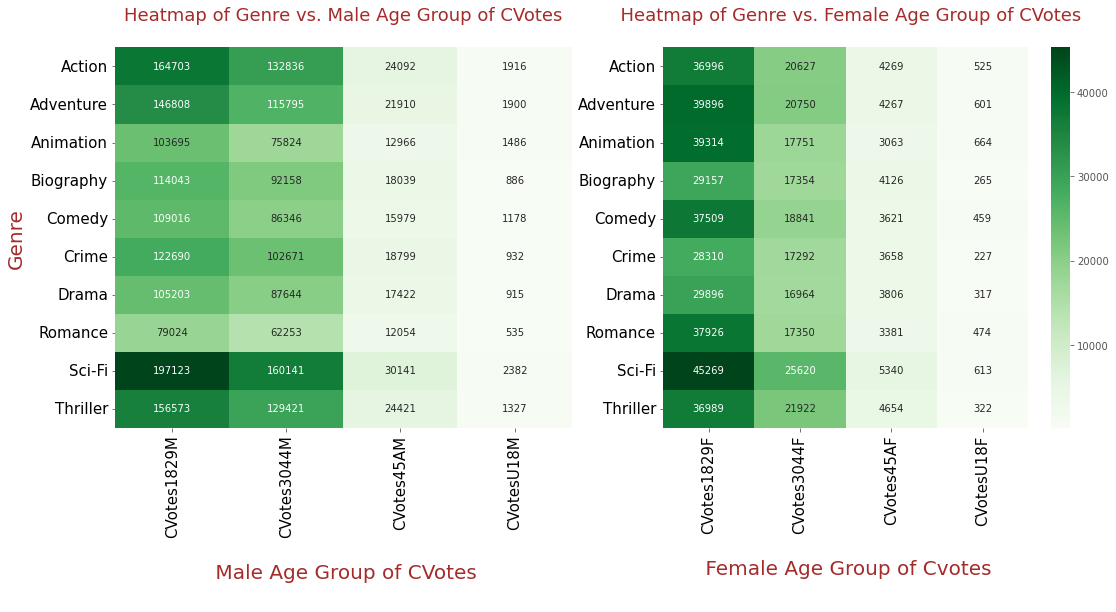

In [61]:
# 1st set of heat maps for CVotes-related columns

plt.figure(figsize = [18,7])

plt.subplot(1,2,1)

h1 = sns.heatmap(m_cvote_genre,annot = True, cmap = "Greens", cbar = False, fmt = "d", color = "Black")
h1.set_xlabel("\n Male Age Group of CVotes\n", fontsize = 20, color = "Brown")
h1.set_ylabel("Genre", fontsize = 20, color = "Brown")
plt.xticks(fontsize =15, color ="Black", rotation = 90)
plt.yticks(fontsize = 15, color = "Black")
plt.title("Heatmap of Genre vs. Male Age Group of CVotes\n ", fontdict = {"fontsize": 18, "fontweight":5, "color": "Brown"})
plt.subplot(1,2,2)
h2 = sns.heatmap(f_cvote_genre,annot = True, cmap = "Greens", fmt = "d", color = "Black")
h2.set_xlabel("\n Female Age Group of Cvotes", fontsize = 20, color = "Brown")
h2.set_ylabel("", fontsize = 20, color = "Brown")
plt.xticks(fontsize =15, color ="Black", rotation = 90)
plt.yticks(fontsize = 15, color = "Black")
plt.title("  Heatmap of Genre vs. Female Age Group of CVotes\n ", fontdict = {"fontsize": 18, "fontweight":5, "color": "Brown"})

plt.show()



**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1: People in the range of 18-44 yrs of age voted more irrespective of their gender.
- Inference 2: Sci-Fi though is most voted over here but still the no. of genres made most was Drama (almost around 65) as was evident in previous barplot task.
- Inference 3: Romance is least voted in the every age group of male (if we compare it to other genres) where as the same can't be said for female age group. Still Males voted more than females.

In [62]:
# Preparing pivot table for female-vote vs genre

f_vote_genre = pd.pivot_table(data = genre_top10, index = ["genre"], values = ["VotesU18F", "Votes1829F", "Votes3044F","Votes45AF"])
f_vote_genre

,Votes1829F,Votes3044F,Votes45AF,VotesU18F
genre,,,,
Action,8.00,7.80,7.75,8.28
Adventure,8.09,7.87,7.84,8.29
Animation,8.20,7.98,7.88,8.25
Biography,7.93,7.77,7.87,8.16
Comedy,7.95,7.75,7.70,8.13
Crime,7.76,7.61,7.68,7.97
Drama,7.92,7.72,7.74,8.15
Romance,7.91,7.66,7.61,8.16
Sci-Fi,8.04,7.84,7.74,8.33


In [63]:
# Preparing pivot table for male-vote vs genre variable

m_vote_genre = pd.pivot_table(data = genre_top10, index = ["genre"], values = ["VotesU18M", "Votes1829M", "Votes3044M","Votes45AM"])
m_vote_genre

,Votes1829M,Votes3044M,Votes45AM,VotesU18M
genre,,,,
Action,7.98,7.73,7.63,8.15
Adventure,8.01,7.73,7.64,8.14
Animation,7.99,7.72,7.65,7.97
Biography,7.98,7.72,7.66,8.14
Comedy,7.99,7.71,7.60,8.13
Crime,8.02,7.76,7.62,8.26
Drama,8.00,7.71,7.62,8.19
Romance,7.92,7.61,7.50,8.06
Sci-Fi,8.11,7.85,7.69,8.29


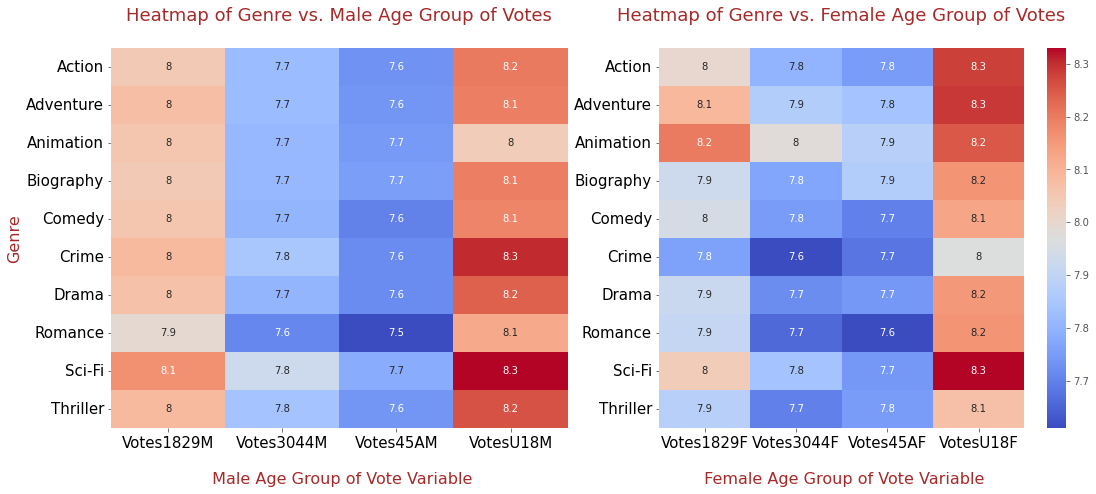

In [64]:
# 2nd set of heat maps for Votes-related columns


plt.figure(figsize = [18,7])
plt.subplot(1,2,1)

h1 = sns.heatmap(m_vote_genre,annot = True, cmap = "coolwarm", cbar = False)
h1.set_xlabel("\n Male Age Group of Vote Variable", fontsize = 16,color = "Brown")
h1.set_ylabel("Genre",fontsize = 16,color = "Brown")
plt.xticks(fontsize =15, color ="Black")
plt.yticks(fontsize = 15, color = "Black")
plt.title("Heatmap of Genre vs. Male Age Group of Votes\n ", fontdict = {"fontsize": 18, "fontweight":5, "color": "Brown"})
plt.subplot(1,2,2)
h2 = sns.heatmap(f_vote_genre,annot = True, cmap = "coolwarm")
h2.set_xlabel("\n Female Age Group of Vote Variable", fontsize = 16,color = "Brown")
h2.set_ylabel(" ", fontsize = 13)
plt.xticks(fontsize =15, color ="Black")
plt.yticks(fontsize = 15, color = "Black")
plt.title("Heatmap of Genre vs. Female Age Group of Votes\n ", fontdict = {"fontsize": 18, "fontweight":5, "color": "Brown"})


plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1: In Genre: Adventure, we can notice that there is is a slightly causal relationship ( as age increases- avg. votes given people (irrespective of gender) decreases). With this we can infer that age increases, interest in adventure genre type of movies decreases slightly. But at the same time we can notice that avg votes rating for Adventure is not less than 7.6 (which is also a good no.). Thus, we can conclude: that there is slight causal relationship b/w age and adventure votes movies but it does not it is not liked by them. In fact it is liked by them but the hidden pattern from data gives this insights that their liking for them decreases slightly with the increase in their age. Alos avg votes for all the age group in females is higher than that of all the age categories for males

- Inference 2: In the age group of 30-44 yrs: for all the genres: avg votes by females is higher than that for males except for Crimes Genre Movies where avg votes by males is slightly higher than the avg votes of females. So this is the hidden insight from the data for this age group for the given genre. But stil the avgt vote by female is not less than 7.6 (which is still a good no.) Thus, we can say that there is likeness among female too for Crime movies but it is slightly less than that for males. 

Another: For all age group group in Crime genre movies: in males: there is a clear pattern that there is a slight causal relationship that can be observed: with the increase in age, avg votes decreases. but in the female for this genre: same kind of patterns and relationship can be observed from under 18 years age group to 44 years age group. In 45 & above age group: crime movies avg vote increases.   

- Inference 3: For Genre: Animation: avg votes: (males when compared against females) for each correspopnding age group: avg votes by females is always higher for all the age group when compared to males' for the genre : Animation  

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [65]:
# Creating IFUS column

movies["IFUS"] = movies.apply(lambda x: "USA" if x["Country"] == "USA" else "non-USA", axis = 1)
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,total_fb_likes,IFUS
94,Boyhood,2014,4.0,25.4,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.0,127.0,...,7.7,7.2,8.0,7.9,R,USA,21.4,8.95,550.0,USA
69,12 Years a Slave,2013,20.0,56.7,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,...,8.1,7.7,8.3,8.0,R,USA,36.7,8.85,3160.0,USA
18,Inside Out,2015,175.0,356.5,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,7.9,7.6,8.2,8.1,PG,USA,181.5,8.80,2151.0,USA
12,Toy Story 3,2010,200.0,415.0,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.5,8.3,G,USA,215.0,8.75,16721.0,USA
4,Manchester by the Sea,2016,9.0,47.7,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.1,7.9,7.8,R,USA,38.7,8.75,74818.0,USA


In [66]:
# Sanity Check for the above task:
# Checking the values for the above task:

movies.IFUS.value_counts()

USA        81
non-USA    19
Name: IFUS, dtype: int64

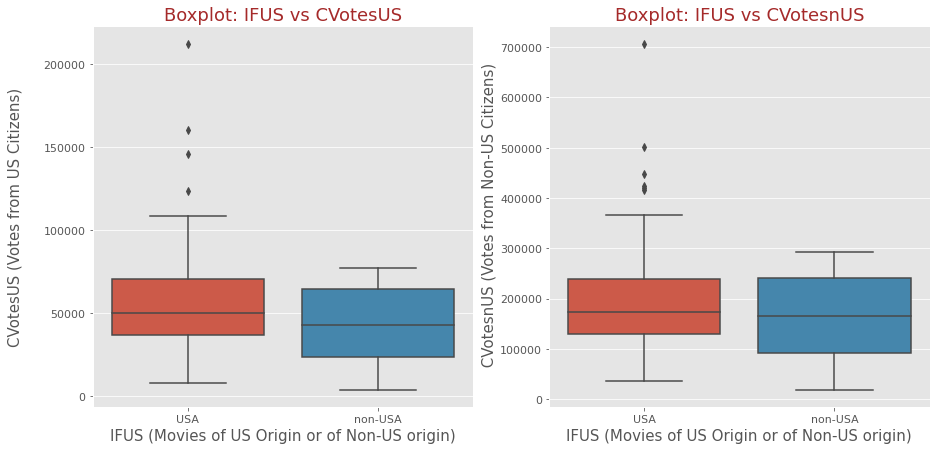

In [67]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)

plt.figure(figsize = [15,7])
plt.subplot(1,2,1)
b1 = sns.boxplot(data = movies, x = "IFUS", y = "CVotesUS")
plt.title("Boxplot: IFUS vs CVotesUS", fontdict = {"fontsize":18, "fontweight":5, "color":"Brown"})
b1.set_xlabel("IFUS (Movies of US Origin or of Non-US origin)",fontsize = 15)
b1.set_ylabel("CVotesUS (Votes from US Citizens)\n",fontsize = 15)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

plt.subplot(1,2,2)
b2 = sns.boxplot(data = movies, x = "IFUS", y = "CVotesnUS")
plt.title("Boxplot: IFUS vs CVotesnUS", fontdict = {"fontsize":18, "fontweight":5, "color": "Brown"})
b2.set_xlabel("IFUS (Movies of US Origin or of Non-US origin)",fontsize = 15)
b2.set_ylabel("\n CVotesnUS (Votes from Non-US Citizens)",fontsize = 15)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

plt.show()



In [68]:
# For better Reading of the above graphs: 
# performing some checks: to get more insights from the above plots:
# CVotesUS vs. IFUS Graph:

movies.groupby(by = ["IFUS"])["CVotesUS"].describe()

,count,mean,std,min,25%,50%,75%,max
IFUS,,,,,,,,
USA,81.0,57112.814815,33032.983526,7362.0,36644.0,49851.0,70110.0,212524.0
non-USA,19.0,41238.736842,24648.046620,3678.0,23331.5,42556.0,64146.5,76797.0


In [69]:
# For better reading of CVotesUS vs. IFUS Graph:

movies.groupby(by = ["IFUS"])["CVotesnUS"].describe()

,count,mean,std,min,25%,50%,75%,max
IFUS,,,,,,,,
USA,81.0,195673.604938,110073.662574,36050.0,129487.0,173002.0,239125.0,707266.0
non-USA,19.0,156579.263158,87737.828107,19009.0,91744.5,164526.0,241684.5,292714.0


**`Inferences:`** Write your two inferences/observations below:
- Inference 1: non-USA movies irrespective of voter of any specific country: the data is uniformly distributed whereas if we see the USA origin movies: we can observe the outliers irrespective of the type of voters. 
- Inference 2: In both the boxplots: we can observe that USA origin movies are voted more by both the US Voters and non-US voters when compared to non - USA origin movies.

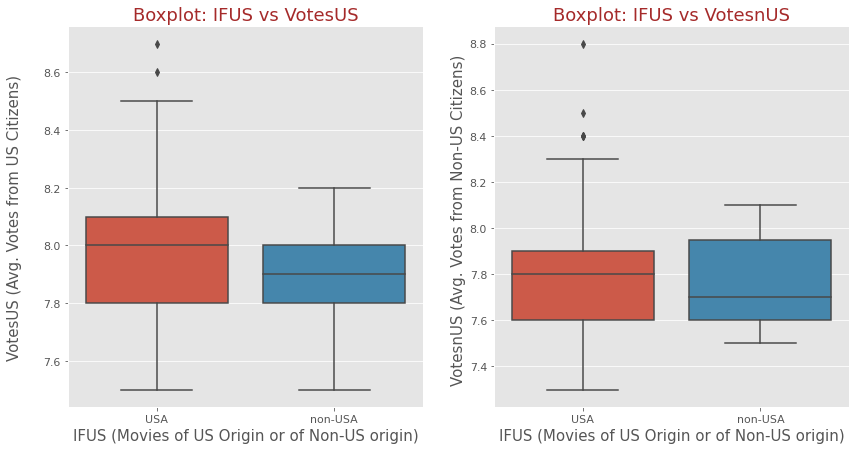

In [70]:
# Box plot - 2: VotesUS(y) vs IFUS(x)

plt.figure(figsize = [14,7])
plt.subplot(1,2,1)
b1 = sns.boxplot(data = movies, x = "IFUS", y = "VotesUS")
plt.title("Boxplot: IFUS vs VotesUS", fontdict = {"fontsize":18, "fontweight":5, "color":"Brown"})
b1.set_xlabel("IFUS (Movies of US Origin or of Non-US origin)",fontsize = 15)
b1.set_ylabel("VotesUS (Avg. Votes from US Citizens)\n",fontsize = 15)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

plt.subplot(1,2,2)
b2 = sns.boxplot(data = movies, x = "IFUS", y = "VotesnUS")
plt.title("Boxplot: IFUS vs VotesnUS", fontdict = {"fontsize":18, "fontweight":5, "color":"Brown"})
b2.set_xlabel("IFUS (Movies of US Origin or of Non-US origin)",fontsize = 15)
b2.set_ylabel("VotesnUS (Avg. Votes from Non-US Citizens) ",fontsize = 15)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)


plt.show()

In [71]:
# For better Reading of the above graphs: 
# performing some checks: to get more insights from the above plots:
# VotesUS vs. IFUS Graph:

In [72]:
movies.groupby(by = ["IFUS"])["VotesUS"].describe()

,count,mean,std,min,25%,50%,75%,max
IFUS,,,,,,,,
USA,81.0,7.972840,0.241874,7.5,7.8,8.0,8.1,8.7
non-USA,19.0,7.894737,0.177869,7.5,7.8,7.9,8.0,8.2


In [73]:
# For better Reading of the above graphs: 
# performing some checks: to get more insights from the above plots:
# VotesnUS vs. IFUS Graph:

In [74]:
movies.groupby(by = ["IFUS"])["VotesnUS"].describe()

,count,mean,std,min,25%,50%,75%,max
IFUS,,,,,,,,
USA,81.0,7.801235,0.279058,7.3,7.6,7.8,7.90,8.8
non-USA,19.0,7.757895,0.189490,7.5,7.6,7.7,7.95,8.1


**`Inferences:`** Write your two inferences/observations below:
- Inference 1:Avg rating given by both the US and non US people for USA origin movies has been higher than that of non USA origin movies.
- Inference 2: Also Distribution of data for USA origion movies is not uniform (outliers are evident of it) but uniformity in data distribution can be seen for non US origin movies with no presence of outlier in the plot above.   

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [75]:
# Sorting by CVotes1000


genre_top10.sort_values(["CVotes1000"],ascending = False, inplace = True)  


In [76]:
genre_top10.head()

,genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
8,Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
0,Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
9,Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
1,Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
5,Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0


In [77]:
# Since the column is hiding in the output above: thus, verifying if the abopve task is rightly performed or not

genre_top10['CVotes1000']

8    714
0    681
9    669
1    662
5    620
4    605
3    600
6    585
2    578
7    548
Name: CVotes1000, dtype: int32

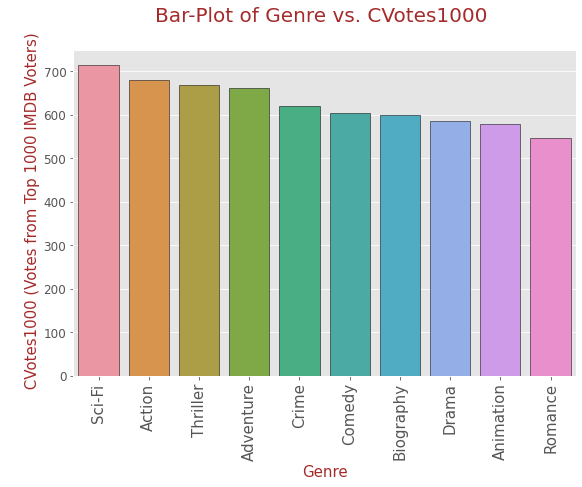

In [78]:
# Bar plot

plt.figure(figsize = [9,6])
sns.barplot(data = genre_top10, x = "genre", y = "CVotes1000", estimator = sum, edgecolor = "Black")
plt.xlabel("Genre", fontdict = {"fontsize":15, "fontweight":5,"color":"Brown"})
plt.xticks(rotation = 90, fontsize = 15)

plt.ylabel("\n CVotes1000 (Votes from Top 1000 IMDB Voters)", fontdict = {"fontsize":15, "fontweight":5,"color":"Brown"})
plt.yticks(fontsize = 12)
plt.title("Bar-Plot of Genre vs. CVotes1000 \n", fontdict = {"fontsize":20, "fontweight":5, "color":"Brown"})
plt.show()



In [79]:
# Making the pivot table for genre and CVotes1000: String that table in a new variable named as res
res = pd.pivot_table(data = genre_top10, index = "genre", values = "CVotes1000", aggfunc = sum)
res

,CVotes1000
genre,
Action,681
Adventure,662
Animation,578
Biography,600
Comedy,605
Crime,620
Drama,585
Romance,548
Sci-Fi,714


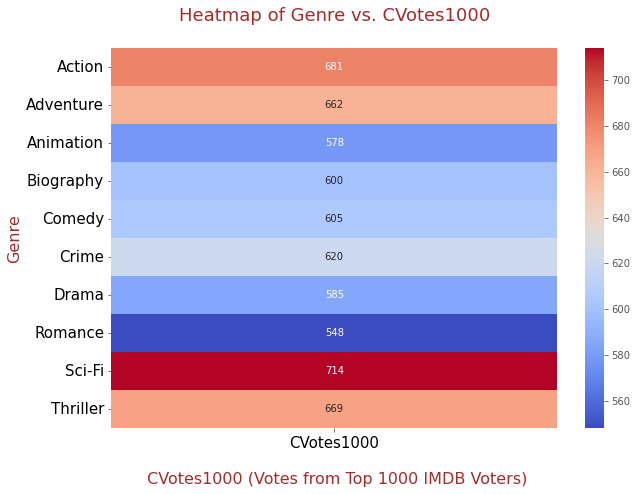

In [80]:
# Making the heatmap of genre mapped with the values of CVotes 1000.

plt.figure(figsize = [10,7])

sns.heatmap(res, annot = True, cmap = "coolwarm", fmt = "d")
plt.title("Heatmap of Genre vs. CVotes1000\n ", fontdict = {"fontsize": 18, "fontweight":5, "color": "Brown"})
plt.xlabel("\n CVotes1000 (Votes from Top 1000 IMDB Voters)", fontsize = 16,color = "Brown")
plt.ylabel("Genre",fontsize = 16,color = "Brown")

plt.xticks(fontsize =15, color ="Black")
plt.yticks(fontsize = 15, color = "Black")

plt.show()

**`Inferences:`** Write your inferences/observations here.

1) Least voted is Romance Genre Movies and Most voted is SciFi Genre movies.
2) With the previous tasks (bar charts) -  we could observe that in the dataset: we have large no. movies of genre: Drama, but still SciFi Genre movies not that much in the dataset: we can say that Sci Fi movies are still the most voted across all age groups irrespective of any gender. This is agin confirmed with Top 1000 IMDB voters too.
3) Also we could observe that movies of genre: Action, Adventure and Thriller: have not much significant difference in their votings but they all are on the high scale of voting: thus, we can say for them that they go hand in hand.
4) People show medium scale interest ( low-medium-high) in movies of genre like Animation, Biography, Comedy, Crime, Drama.
We noted in earlier tasks that Animation type movies are liked by each age group of females and males but in females avg votes are higher than that of males'. But here when we see Animation when compared to other genres is the 2nd least voted geres by IMDB Top 1000 Voters.

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters. ---> Ans. True

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.